In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9888888888888889

超参数: 在算法运行前需要决定的参数
模型参数: 算法过程中学习的参数

寻找好的超参数:
1. 领域知识
2. 经验数值
3. 实验搜索

## 寻找最好的K

In [4]:
best_score = 0.0
best_k = -1

for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

print("Best_k = ", best_k)
print("Best_score = ", best_score)

Best_k =  4
Best_score =  0.9916666666666667


如果找到的参数k=10, 则需要拓展搜索范围, 因为找到的k在边界

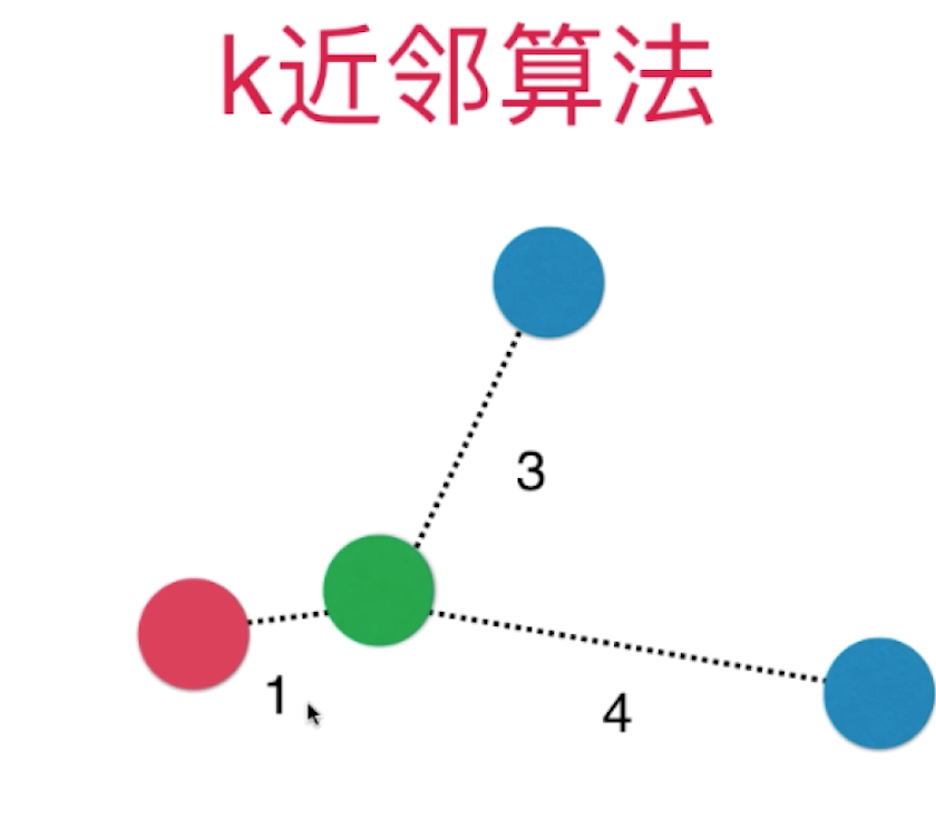
考虑权重, 红色获胜

普通的knn算法, 蓝色获胜
考虑权重之后, 可解决平票问题
权重一般为距离的倒数

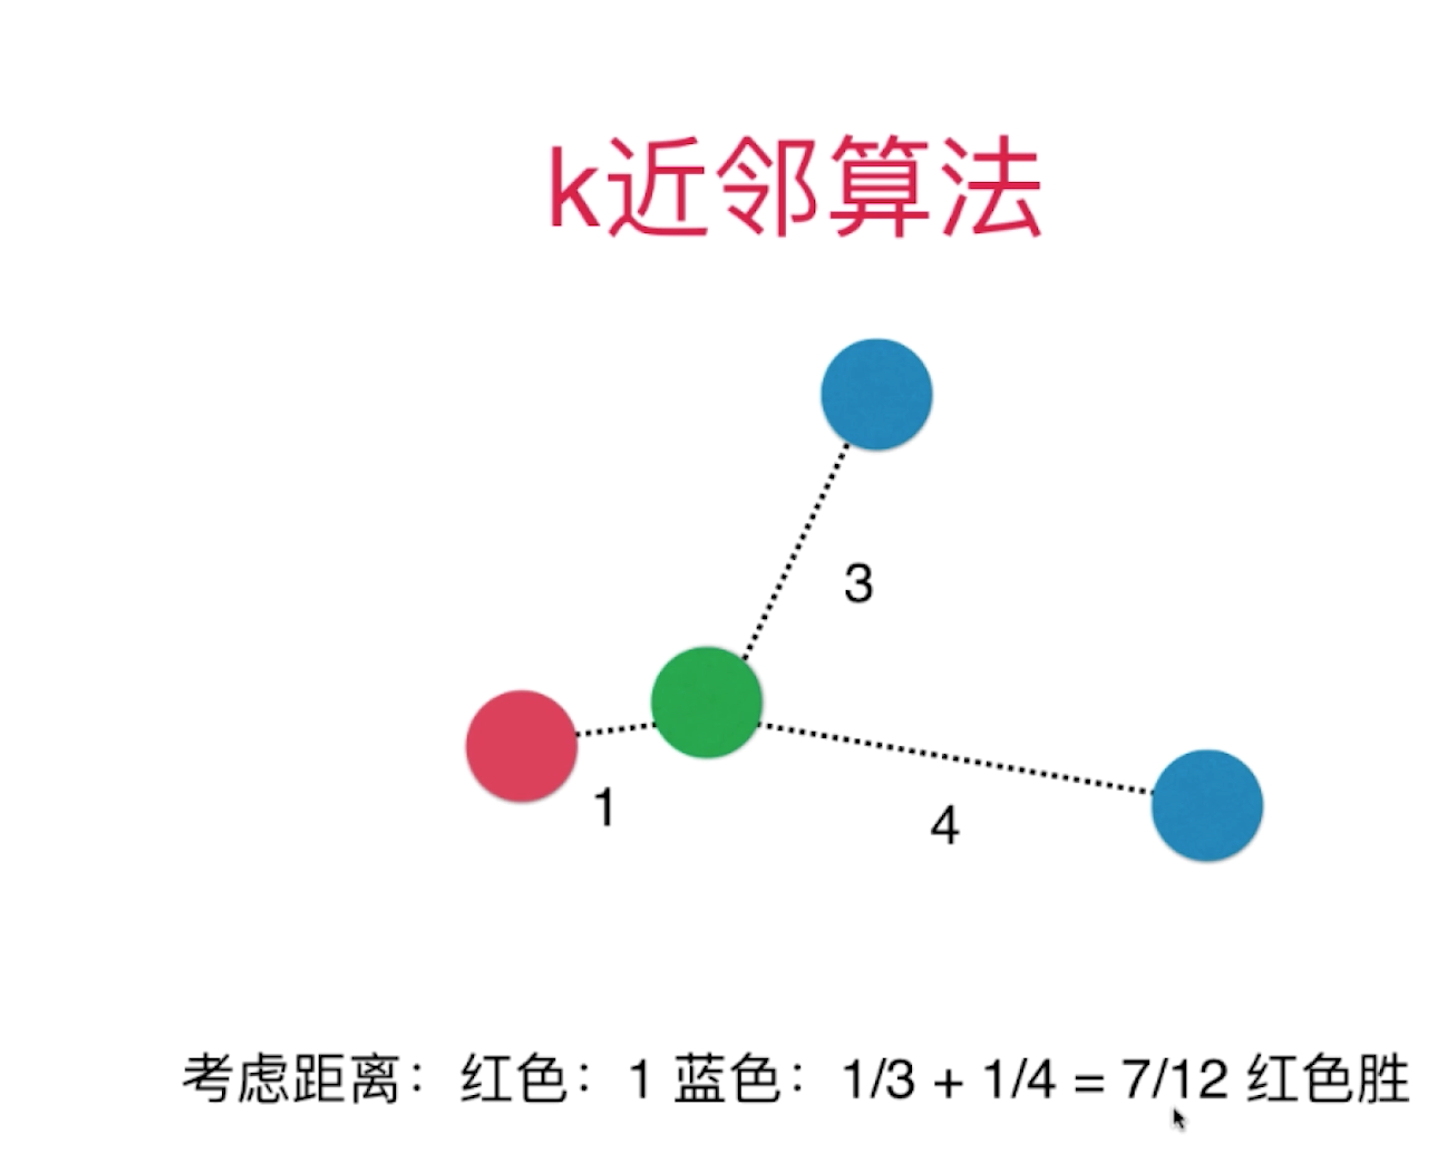

### 考虑距离?不考虑距离

In [5]:
best_method = ""
best_score = 0.0
best_k = -1
for method in ["uniform", "distance"]:
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_kt = k
            best_score = score
            best_method = method
print("Best_k = ", best_k)
print("Best_score = ", best_score)
print("best_method = ", best_method)

Best_k =  -1
Best_score =  0.9916666666666667
best_method =  uniform


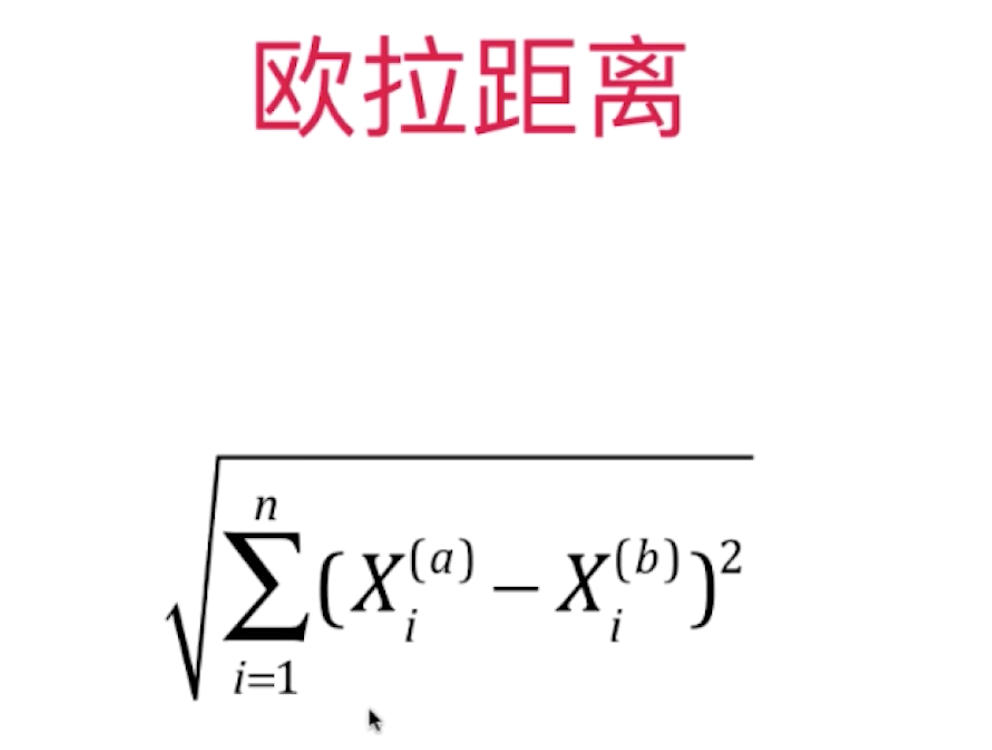

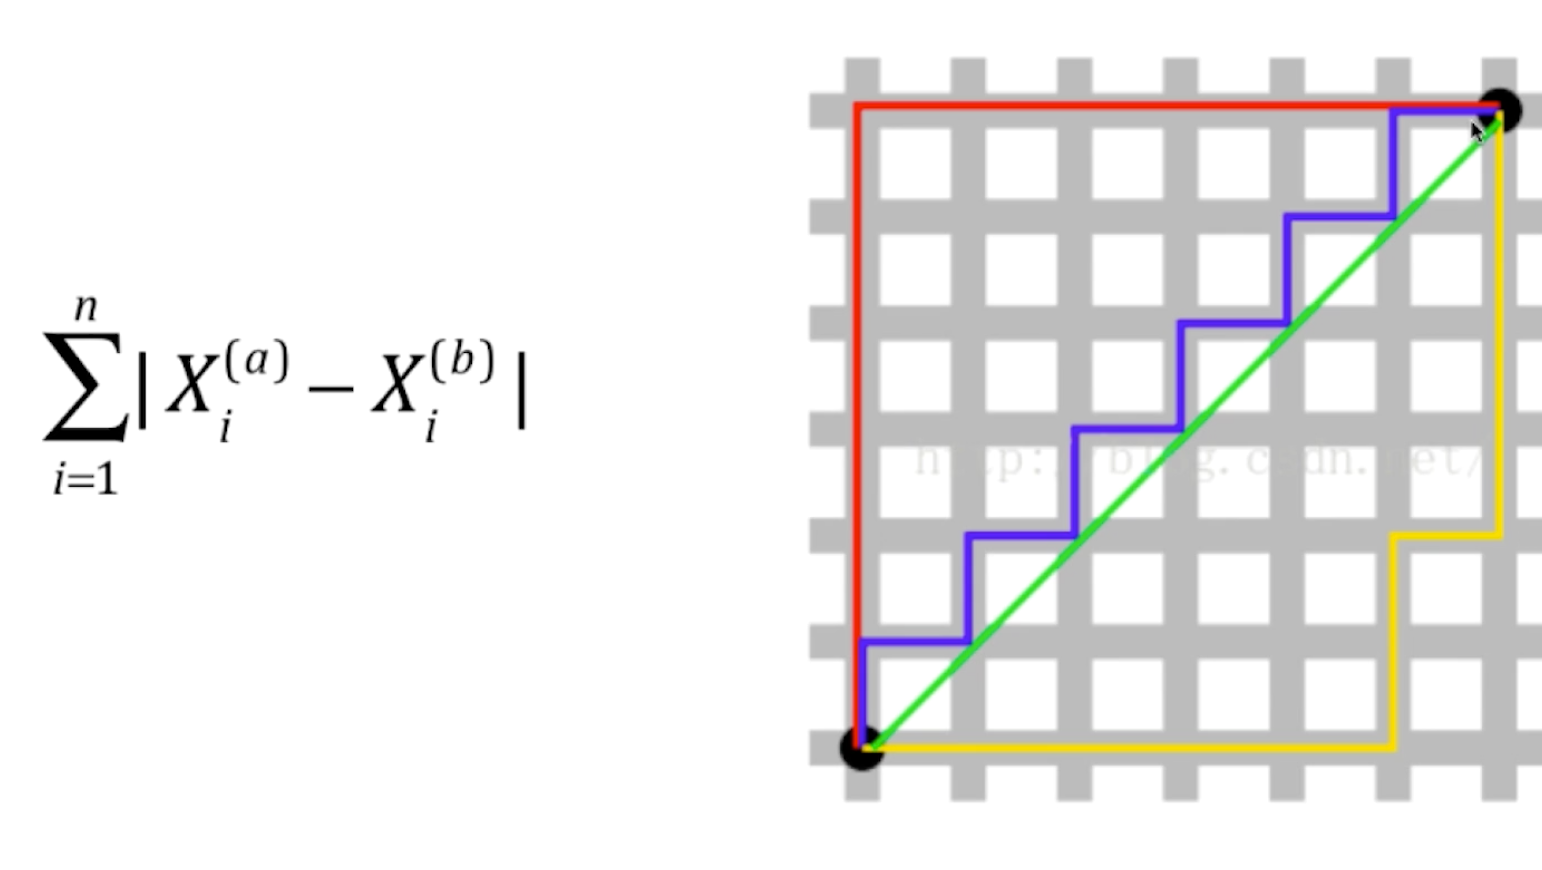

黑点之间的曼哈顿距离 = 在x方向上的差值 + 在y方向上的差值

## 明科夫斯基距离
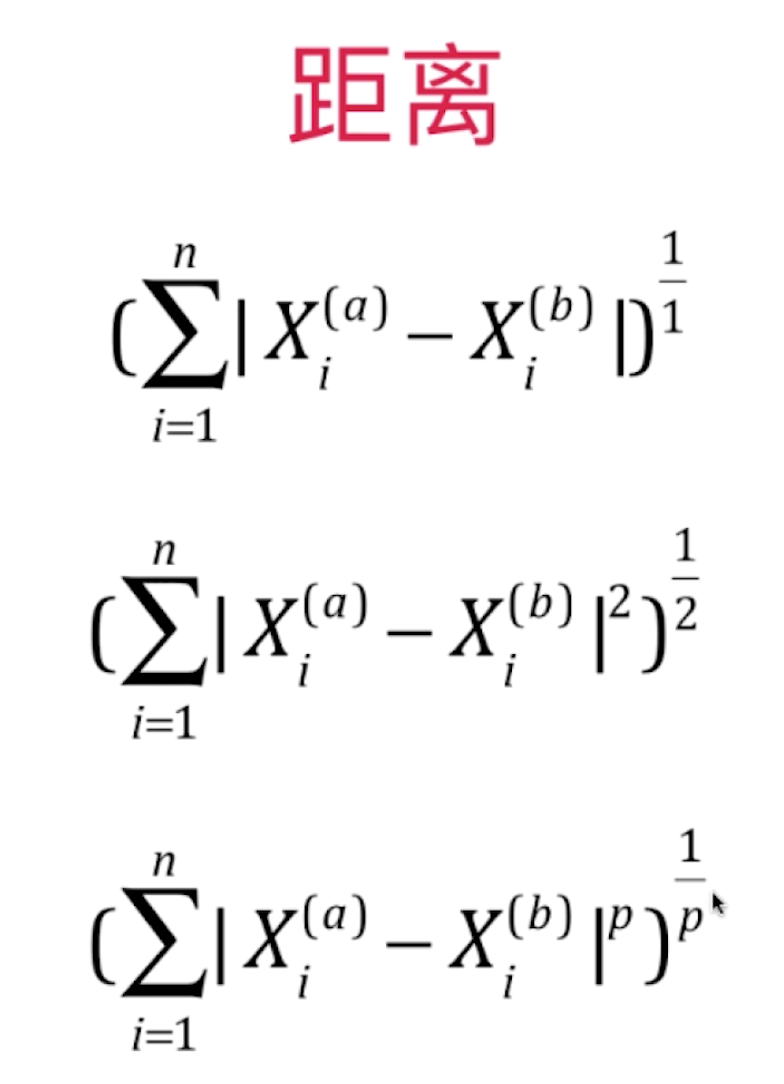

## 搜索明可夫斯基距离相应的p

In [14]:
%%time
# 计时函数

best_p = -1
best_score = 0.0
best_k = -1

for k in range(1, 11):
    for p in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_p = p


print("Best_k = ", best_k)
print("Best_score = ", best_score)
print("best_p = ", best_p)

Best_k =  3
Best_score =  0.9888888888888889
best_p =  2
CPU times: user 34.4 s, sys: 249 ms, total: 34.6 s
Wall time: 34.9 s
